<a href="https://colab.research.google.com/github/escorpio11/programa-python/blob/main/UNI/VISUALIZACION_DE_DATOS/M%C3%93DULO_5_Matplotlib_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

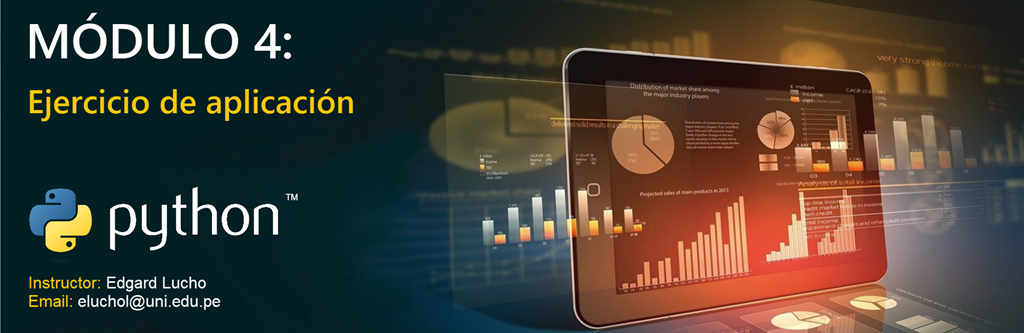

<table width='99%'>
<tr>
<td bgcolor='#306998'>

# **<font color="#FFFFFF">Módulo 5: Matplotlib</font>**

</td>
</tr>
</table>

[Base de datos de sísmos para realizar estudios en sismología](https://ultimosismo.igp.gob.pe/descargar-datos-sismicos)

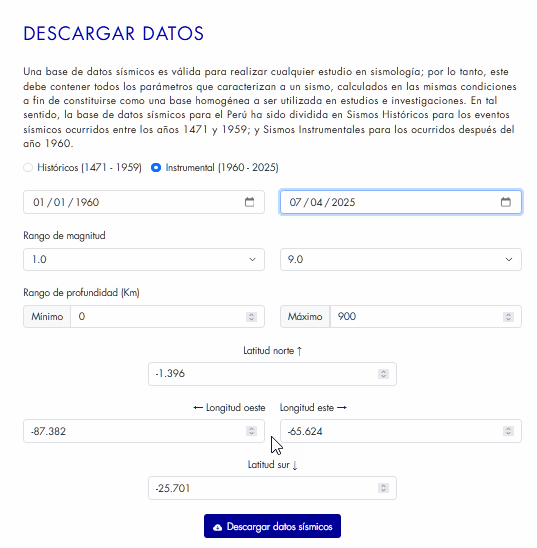

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


<table width='99%'>
<tr>
<td bgcolor='#FFC901'>

## **<font color="#008000"> Visualizar la cantidad de Filas y Columnas de la data</font>**

</td>
</tr>
</table>

In [ ]:
import pandas as pd

df = pd.read_excel('drive/MyDrive/db/sismos.xlsx')
fil, col = df.shape
print(f'Filas: {fil}, Columnas: {col}')


Filas: 24472, Columnas: 6


In [ ]:
df.head()

,fecha UTC,hora UTC,latitud (º),longitud (º),profundidad (km),magnitud (M)
0,1960-01-13,15:40:34.00,-16.145,-72.144,60,7.5
1,1960-01-15,09:30:24.00,-15.000,-75.000,70,7.0
2,1960-01-17,02:57:58.00,-14.500,-74.500,150,6.4
3,1960-01-23,03:37:32.00,-12.500,-68.500,300,5.8
4,1960-01-30,05:07:24.00,-5.500,-77.500,100,5.7


In [ ]:
df.tail()

,fecha UTC,hora UTC,latitud (º),longitud (º),profundidad (km),magnitud (M)
24467,2025-04-04,23:59:49,-14.53,-76.31,21,4.0
24468,2025-04-05,09:40:21,-13.51,-71.83,13,3.7
24469,2025-04-05,11:39:42,-16.76,-70.61,8,3.6
24470,2025-04-07,12:17:14,-5.22,-81.02,32,4.2
24471,2025-04-07,15:24:02,-12.25,-76.31,111,4.4


<table width='99%'>
<tr>
<td bgcolor='#FFC901'>

## **<font color="#008000"> Analizando los tipos de datos de las columnas</font>**

</td>
</tr>
</table>

In [ ]:
df.dtypes

,0
fecha UTC,object
hora UTC,object
latitud (º),float64
longitud (º),float64
profundidad (km),int64
magnitud (M),float64


<table width='99%'>
<tr>
<td bgcolor='#FFC901'>

## **<font color="#008000"> Eliminamos la columna 'hora UTC'</font>**

</td>
</tr>
</table>

In [ ]:
df.drop(columns='hora UTC', inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24472 entries, 0 to 24471
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   fecha UTC         24472 non-null  object 
 1   latitud (º)       24472 non-null  float64
 2   longitud (º)      24472 non-null  float64
 3   profundidad (km)  24472 non-null  int64  
 4   magnitud (M)      24472 non-null  float64
dtypes: float64(3), int64(1), object(1)
memory usage: 956.1+ KB


<table width='99%'>
<tr>
<td bgcolor='#FFC901'>

## **<font color="#008000"> Cambiamos los nombres de las columnas</font>**

</td>
</tr>
</table>

In [ ]:
df.columns=['Fecha', 'Latitud', 'Longitud', 'Profundidad', 'Magnitud']


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24472 entries, 0 to 24471
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Fecha        24472 non-null  object 
 1   Latitud      24472 non-null  float64
 2   Longitud     24472 non-null  float64
 3   Profundidad  24472 non-null  int64  
 4   Magnitud     24472 non-null  float64
dtypes: float64(3), int64(1), object(1)
memory usage: 956.1+ KB


<table width='99%'>
<tr>
<td bgcolor='#FFC901'>

## **<font color="#008000"> Cambiamos el tipo de dato object de la columna Fecha a DateTime64(ns)</font>**

</td>
</tr>
</table>

In [ ]:
df['Fecha'] = pd.to_datetime(df['Fecha'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24472 entries, 0 to 24471
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Fecha        24472 non-null  datetime64[ns]
 1   Latitud      24472 non-null  float64       
 2   Longitud     24472 non-null  float64       
 3   Profundidad  24472 non-null  int64         
 4   Magnitud     24472 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(1)
memory usage: 956.1 KB


<table width='99%'>
<tr>
<td bgcolor='#FFC901'>

## **<font color="#008000">Biblioteca geopy</font>**

</td>
</tr>
</table>

**geopy** es una biblioteca de Python que facilita la geocodificación, la obtención de coordenadas geográficas (latitud y longitud) a partir de direcciones, y otras operaciones geográficas.

<table width='99%'>
<tr>
<td bgcolor='#008000'>

### **<font color="#FFC901"> Características</font>**

</td>
</tr>
</table>

>* **Geocodificación**:
  * Convierte direcciones en coordenadas geográficas.
También puede convertir coordenadas en direcciones (inversa).
>* **Soporte para múltiples servicios**:
  * Funciona con varios proveedores de geocodificación, como Google Maps, OpenStreetMap, Bing Maps, entre otros.
>* **Facilidad de uso**:
  * Proporciona una interfaz sencilla para realizar operaciones geográficas.
>* **Cálculos de distancia**:
  * Permite calcular distancias entre puntos geográficos utilizando la fórmula del gran círculo.

<table width='99%'>
<tr>
<td bgcolor='#FFC901'>

## **<font color="#008000">Clase geodesic</font>**

</td>
</tr>
</table>

La clase **geodesic** de la biblioteca geopy en Python se utiliza para calcular distancias en línea recta entre dos puntos en la superficie de la Tierra, teniendo en cuenta la curvatura del planeta. Esto es especialmente útil para aplicaciones de geolocalización y mapeo.

<table width='99%'>
<tr>
<td bgcolor='#008000'>

### **<font color="#FFC901"> Características</font>**

</td>
</tr>
</table>

>* **Cálculo Preciso**: Utiliza el elipsoide de WGS-84, que es el modelo más común para representar la forma de la Tierra.
>* **Interfaz Sencilla**: Permite calcular la distancia entre dos puntos de manera fácil y rápida.
>* **Resultados en Diferentes Unidades**: Puedes obtener la distancia en kilómetros, millas, entre otras unidades.

<table width='99%'>
<tr>
<td bgcolor='#008000'>

### **<font color="#FFC901"> Análisis para una profundidad >= 20 km</font>**

</td>
</tr>
</table>

In [ ]:
df = df[df['Profundidad']>=20]

<table width='99%'>
<tr>
<td bgcolor='#008000'>

### **<font color="#FFC901"> Limitar el análisis a 200km alrededor de Lima</font>**

</td>
</tr>
</table>

In [ ]:
lat_lng_lima = [-12.04318, -77.02824]

In [ ]:
from geopy.distance import geodesic

df_lima = df[df[['Latitud', 'Longitud']].apply(lambda punto: True if geodesic(lat_lng_lima, punto).km <=200 else False, axis=1 )].copy()


In [ ]:
df_lima.head()

,Fecha,Latitud,Longitud,Profundidad,Magnitud
27,1961-01-28,-13.6,-76.3,86,6.0
33,1961-06-17,-12.0,-75.3,29,5.5
70,1962-09-28,-13.8,-76.7,61,4.8
104,1963-06-27,-11.7,-77.6,33,4.7
107,1963-07-05,-11.6,-77.5,55,6.0


In [ ]:
df_lima.describe()

,Fecha,Latitud,Longitud,Profundidad,Magnitud
count,2195,2195.000000,2195.000000,2195.000000,2195.000000
mean,2002-12-11 07:33:58.633257344,-12.336128,-76.953752,56.902961,4.665285
min,1961-01-28 00:00:00,-13.840000,-78.791100,20.000000,3.200000
25%,1991-11-07 12:00:00,-12.970000,-77.410000,37.000000,4.500000
50%,2004-07-30 00:00:00,-12.452400,-76.898300,49.000000,4.600000
75%,2015-03-02 12:00:00,-11.690000,-76.534400,68.000000,4.900000
max,2025-04-07 00:00:00,-10.320000,-75.206000,163.000000,8.000000
std,NaN,0.853307,0.701789,28.364797,0.454871


<table width='99%'>
<tr>
<td bgcolor='#008000'>

### **<font color="#FFC901"> reset_index()</font>**

</td>
</tr>
</table>

El método reset_index() en Pandas se utiliza para restablecer el índice de un DataFrame.

Este método es útil en varias situaciones, especialmente después de realizar operaciones que alteran el índice, como filtrados, agrupaciones o eliminaciones de filas.

In [ ]:
df_lima.reset_index(drop=True, inplace=True)
df_lima.head()

,Fecha,Latitud,Longitud,Profundidad,Magnitud
0,1961-01-28,-13.6,-76.3,86,6.0
1,1961-06-17,-12.0,-75.3,29,5.5
2,1962-09-28,-13.8,-76.7,61,4.8
3,1963-06-27,-11.7,-77.6,33,4.7
4,1963-07-05,-11.6,-77.5,55,6.0


<table width='99%'>
<tr>
<td bgcolor='#008000'>

### **<font color="#FFC901"> Cantidad de sismos desde 28/01/1961 hasta 07/04/2025()</font>**

</td>
</tr>
</table>

In [ ]:
print(f'Desde el 28 de enero de 1961 hasta el 07 de abril de 2025 de han registrado {len(df_lima):,d} sismos alrededor de 200 km de Lima.')

Desde el 28 de enero de 1961 hasta el 07 de abril de 2025 de han registrado 2,195 sismos alrededor de 200 km de Lima.


In [ ]:
lat_lng_vegueta = [-11.02253, -77.64378]
lat_lng_huaura = [-11.07, -77.59944]
lat_lng_huacho = [-11.10667, -77.605]
lat_lng_chancay = [-11.57139, -77.26722]
lat_lng_ancon = [-11.69655375, -77.1116547476923]
lat_lng_lima = [-12.04318, -77.02824]
lat_lng_lurin = [-12.2736, -76.8694]
lat_lng_pucusana = [-12.4817, -76.7975]
lat_lng_mala = [-12.65806, -76.63083]
lat_lng_cañete = [-13.07556, -76.38528]


In [ ]:
punto = [lat_lng_vegueta, lat_lng_huacho, lat_lng_chancay, lat_lng_ancon, lat_lng_lima, lat_lng_lurin, lat_lng_pucusana, lat_lng_mala, lat_lng_cañete]
lugar = ['Vegueta', 'Huacho', 'Chancay', 'Ancón', 'Lima', 'Lurin', 'Pucusana', 'Mala', 'Cañete']

diccionario_lugares = dict(zip(lugar, punto))

for k, v in diccionario_lugares.items():
  print(f'{k}: {v}')

Vegueta: [-11.02253, -77.64378]
Huacho: [-11.10667, -77.605]
Chancay: [-11.57139, -77.26722]
Ancón: [-11.69655375, -77.1116547476923]
Lima: [-12.04318, -77.02824]
Lurin: [-12.2736, -76.8694]
Pucusana: [-12.4817, -76.7975]
Mala: [-12.65806, -76.63083]
Cañete: [-13.07556, -76.38528]


In [ ]:
df_lima.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2195 entries, 0 to 2194
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Fecha        2195 non-null   datetime64[ns]
 1   Latitud      2195 non-null   float64       
 2   Longitud     2195 non-null   float64       
 3   Profundidad  2195 non-null   int64         
 4   Magnitud     2195 non-null   float64       
dtypes: datetime64[ns](1), float64(3), int64(1)
memory usage: 85.9 KB


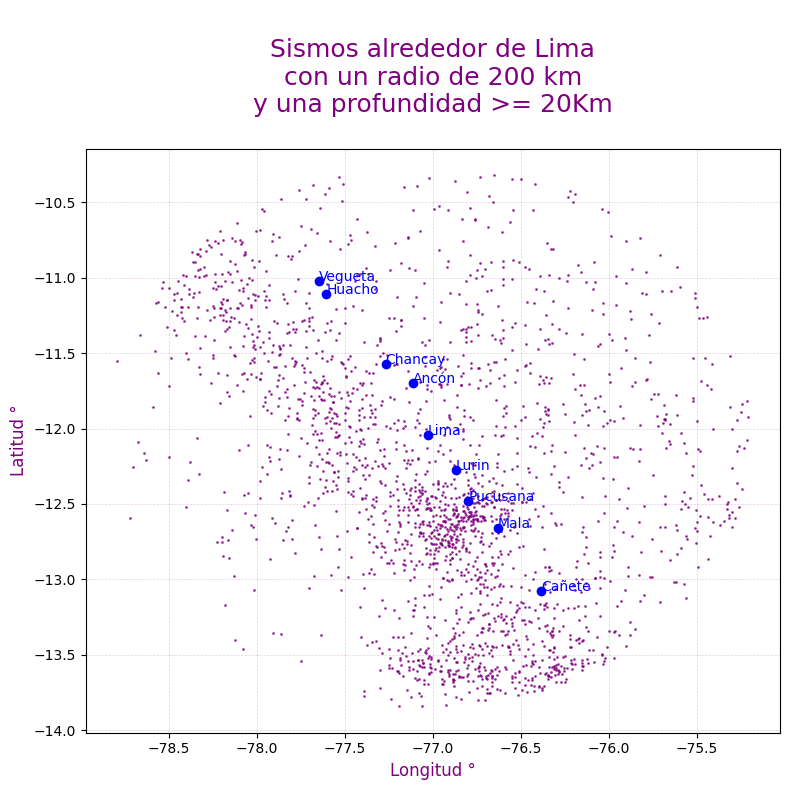

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 8))

plt.scatter(df_lima['Longitud'], df_lima['Latitud'], s=1, color='purple', alpha=0.7)

plt.title('\nSismos alrededor de Lima\ncon un radio de 200 km\ny una profundidad >= 20Km\n', color='purple', fontsize=18)
plt.xlabel('Longitud °', color='purple', fontsize=12)
plt.ylabel('Latitud °', color='purple', fontsize=12)
plt.grid(True, color='purple', linestyle='--', linewidth=0.5, alpha=0.2)

for clave, valor in diccionario_lugares.items():
  plt.scatter(valor[1], valor[0], color='blue')
  plt.annotate(clave, (valor[1], valor[0]), color='blue')

plt.tight_layout()
plt.show()

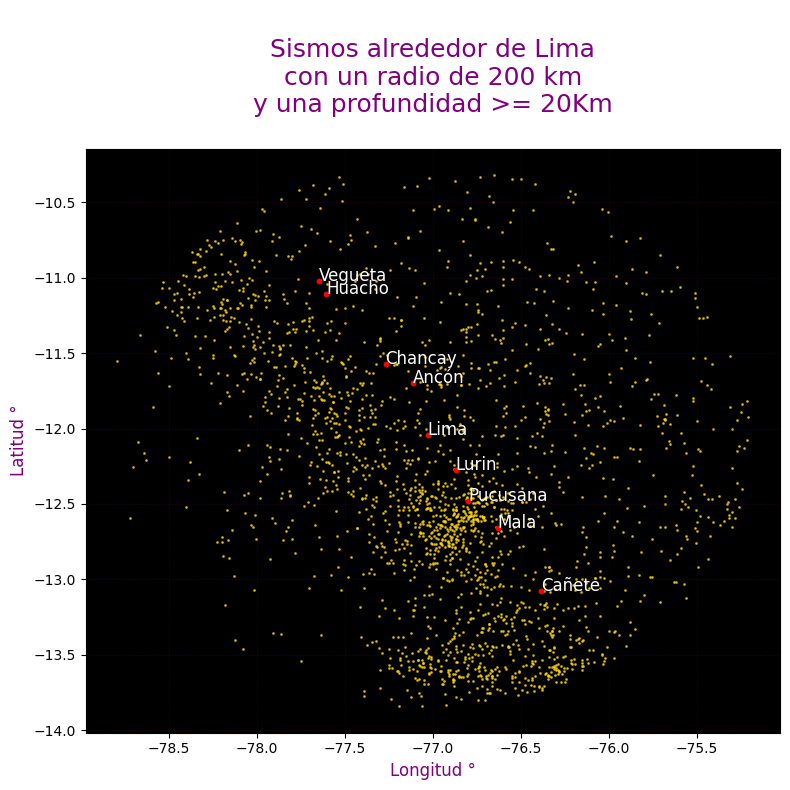

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 8))
plt.gca().set_facecolor('black')

plt.scatter(df_lima['Longitud'], df_lima['Latitud'], s=1, color='gold', alpha=0.7)

plt.title('\nSismos alrededor de Lima\ncon un radio de 200 km\ny una profundidad >= 20Km\n', color='purple', fontsize=18)
plt.xlabel('Longitud °', color='purple', fontsize=12)
plt.ylabel('Latitud °', color='purple', fontsize=12)
plt.grid(True, color='purple', linestyle='--', linewidth=0.5, alpha=0.2)

for clave, valor in diccionario_lugares.items():
  plt.scatter(valor[1], valor[0], color='red', s=10)
  plt.annotate(clave, (valor[1], valor[0]), color='white', fontsize=12)

plt.tight_layout()
plt.show()

<table width='99%'>
<tr>
<td bgcolor='#008000'>

### **<font color="#FFC901">Mostrar la cantidad de sismos por año</font>**

</td>
</tr>
</table>

In [ ]:
df_lima.head()

,Fecha,Latitud,Longitud,Profundidad,Magnitud
0,1961-01-28,-13.6,-76.3,86,6.0
1,1961-06-17,-12.0,-75.3,29,5.5
2,1962-09-28,-13.8,-76.7,61,4.8
3,1963-06-27,-11.7,-77.6,33,4.7
4,1963-07-05,-11.6,-77.5,55,6.0


In [ ]:
df_lima['Año'] = df_lima['Fecha'].dt.year
df_lima.head()

,Fecha,Latitud,Longitud,Profundidad,Magnitud,Año
0,1961-01-28,-13.6,-76.3,86,6.0,1961
1,1961-06-17,-12.0,-75.3,29,5.5,1961
2,1962-09-28,-13.8,-76.7,61,4.8,1962
3,1963-06-27,-11.7,-77.6,33,4.7,1963
4,1963-07-05,-11.6,-77.5,55,6.0,1963


In [ ]:
df_sismos_x_año = df_lima.groupby('Año').size().reset_index(name='Cantidad de Sismos')
df_sismos_x_año.tail(20)

,Año,Cantidad de Sismos
44,2006,31
45,2007,120
46,2008,34
47,2009,25
48,2010,39
49,2011,65
50,2012,78
51,2013,46
52,2014,61
53,2015,40


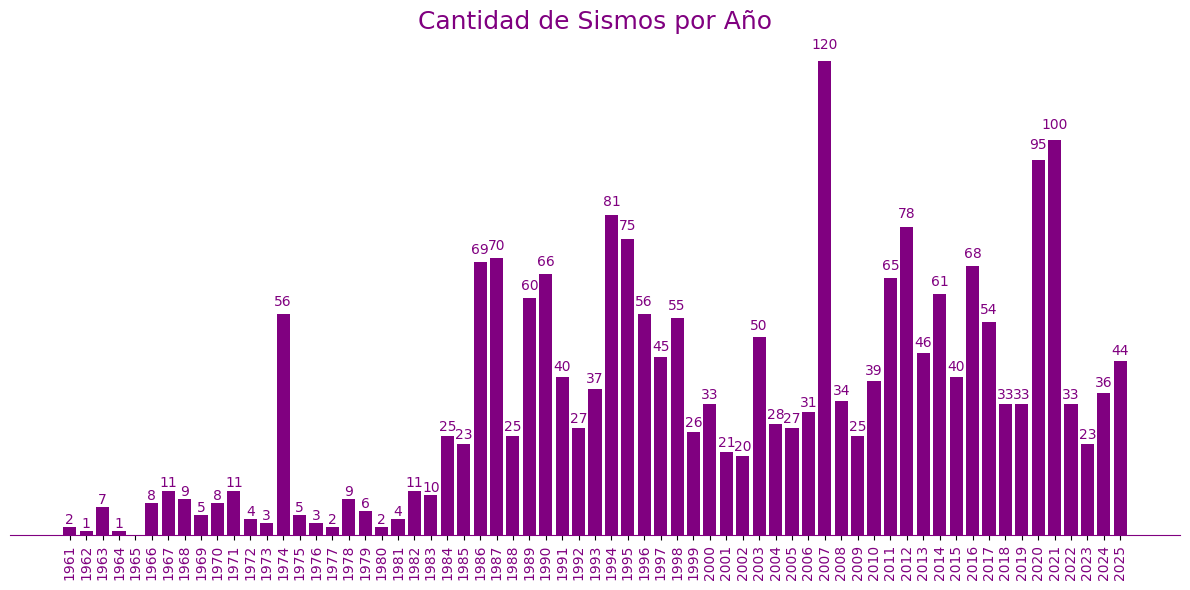

In [ ]:
import numpy as np

plt.figure(figsize=(12, 6))
barras = plt.bar(df_sismos_x_año['Año'], df_sismos_x_año['Cantidad de Sismos'], color='purple')

plt.yticks([])
plt.xticks(rotation=90, ticks=np.arange(df_sismos_x_año['Año'].min(), df_sismos_x_año['Año'].max()+1, 1), color='purple')
plt.title('Cantidad de Sismos por Año', color='purple', fontsize=18)

for barra in barras:
  altura = barra.get_height()
  plt.text(barra.get_x() + barra.get_width()/2, altura*1.02, str(int(altura)), ha='center', va='bottom', color='purple')

plt.gca().spines['top'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['bottom'].set_color('purple')
plt.tight_layout()
plt.show()

<table width='99%'>
<tr>
<td bgcolor='#008000'>

### **<font color="#FFC901">Mostrar la cantidad de sismos por mes</font>**

</td>
</tr>
</table>

In [ ]:
df_lima['MesNum'] = df_lima['Fecha'].dt.month
df_lima['Mes'] = df_lima['Fecha'].dt.month_name()
df_lima.head()

,Fecha,Latitud,Longitud,Profundidad,Magnitud,Año,MesNum,Mes
0,1961-01-28,-13.6,-76.3,86,6.0,1961,1,January
1,1961-06-17,-12.0,-75.3,29,5.5,1961,6,June
2,1962-09-28,-13.8,-76.7,61,4.8,1962,9,September
3,1963-06-27,-11.7,-77.6,33,4.7,1963,6,June
4,1963-07-05,-11.6,-77.5,55,6.0,1963,7,July


In [ ]:
df_sismos_x_mes = df_lima.groupby(['MesNum', 'Mes']).size().reset_index(name='Cantidad')
df_sismos_x_mes.head(12)

,MesNum,Mes,Cantidad
0,1,January,159
1,2,February,160
2,3,March,205
3,4,April,158
4,5,May,178
5,6,June,165
6,7,July,172
7,8,August,257
8,9,September,156
9,10,October,239


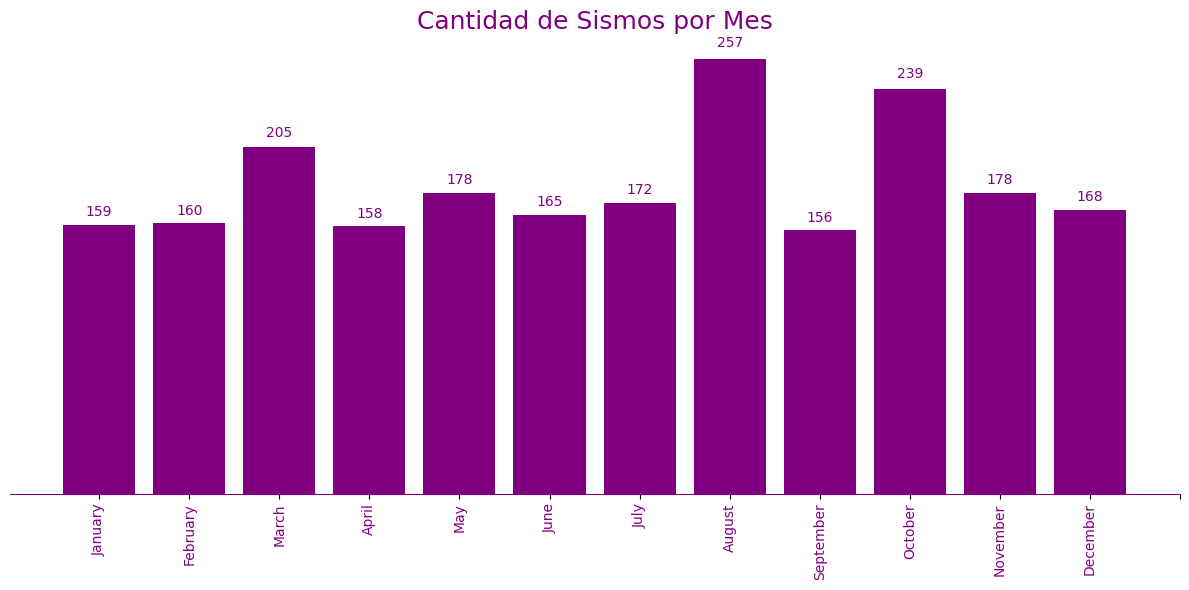

In [ ]:
import numpy as np

plt.figure(figsize=(12, 6))
barras = plt.bar(df_sismos_x_mes['Mes'], df_sismos_x_mes['Cantidad'], color='purple')

plt.yticks([])
plt.xticks(rotation=90, ticks=np.arange(df_sismos_x_mes['MesNum'].min()-1, df_sismos_x_mes['MesNum'].max() + 1, 1), color='purple')
plt.title('Cantidad de Sismos por Mes', color='purple', fontsize=18)

for barra in barras:
  altura = barra.get_height()
  plt.text(barra.get_x() + barra.get_width()/2, altura*1.02, str(int(altura)), ha='center', va='bottom', color='purple')

plt.gca().spines['top'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['bottom'].set_color('purple')
plt.tight_layout()
plt.show()

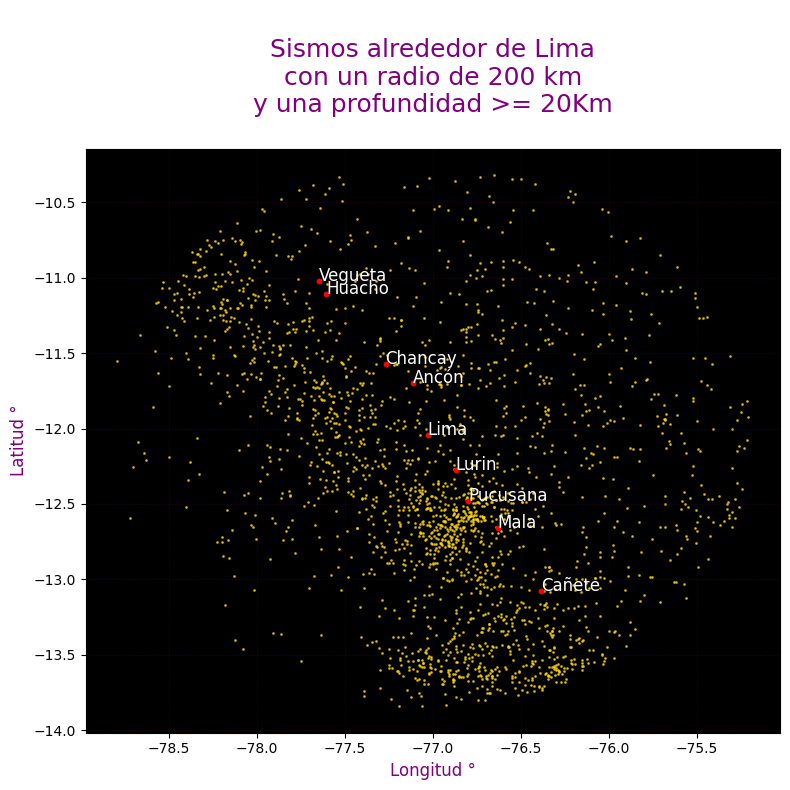

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 8))
plt.gca().set_facecolor('black')

plt.scatter(df_lima['Longitud'], df_lima['Latitud'], s=1, color='gold', alpha=0.7)

plt.title('\nSismos alrededor de Lima\ncon un radio de 200 km\ny una profundidad >= 20Km\n', color='purple', fontsize=18)
plt.xlabel('Longitud °', color='purple', fontsize=12)
plt.ylabel('Latitud °', color='purple', fontsize=12)
plt.grid(True, color='purple', linestyle='--', linewidth=0.5, alpha=0.2)

for clave, valor in diccionario_lugares.items():
  plt.scatter(valor[1], valor[0], color='red', s=10)
  plt.annotate(clave, (valor[1], valor[0]), color='white', fontsize=12)

plt.tight_layout()
plt.show()

In [ ]:
def profundidad_color(profundidad):
  if profundidad <= 50:
    return 'red'
  elif profundidad <= 100:
    return 'purple'
  elif profundidad <= 150:
    return 'green'
  elif profundidad <= 200:
    return 'gold'
  else:
    return 'white'




In [ ]:
df_lima['profundidad_color'] = df_lima['Profundidad'].apply(profundidad_color)
df_lima.head()

,Fecha,Latitud,Longitud,Profundidad,Magnitud,Año,MesNum,Mes,profundidad_color
0,1961-01-28,-13.6,-76.3,86,6.0,1961,1,January,purple
1,1961-06-17,-12.0,-75.3,29,5.5,1961,6,June,red
2,1962-09-28,-13.8,-76.7,61,4.8,1962,9,September,purple
3,1963-06-27,-11.7,-77.6,33,4.7,1963,6,June,red
4,1963-07-05,-11.6,-77.5,55,6.0,1963,7,July,purple


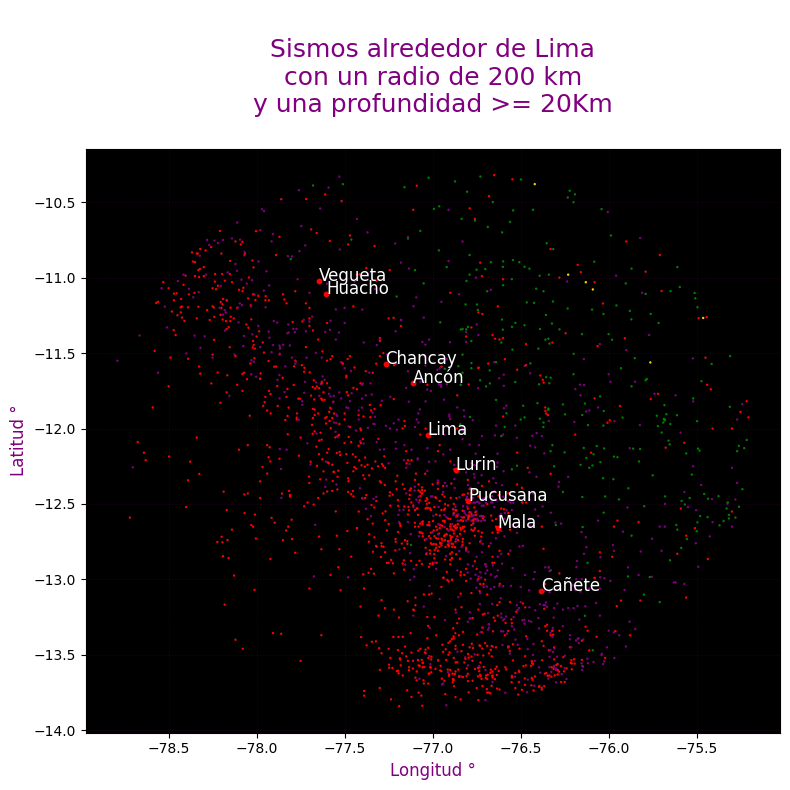

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 8))
plt.gca().set_facecolor('black')

plt.scatter(df_lima['Longitud'], df_lima['Latitud'], color=df_lima['profundidad_color'], s=0.5)

plt.title('\nSismos alrededor de Lima\ncon un radio de 200 km\ny una profundidad >= 20Km\n', color='purple', fontsize=18)
plt.xlabel('Longitud °', color='purple', fontsize=12)
plt.ylabel('Latitud °', color='purple', fontsize=12)
plt.grid(True, color='purple', linestyle='--', linewidth=0.5, alpha=0.2)

for clave, valor in diccionario_lugares.items():
  plt.scatter(valor[1], valor[0], color='red', s=10)
  plt.annotate(clave, (valor[1], valor[0]), color='white', fontsize=12)

plt.tight_layout()
plt.show()

In [ ]:
def profundidad_categoria(profundidad):
  if profundidad < 50:
    return 'Menor 50 km'
  elif profundidad < 100:
    return 'Entre 50 y 100 km'
  elif profundidad <= 150:
    return 'Entre 100 y 150 km'
  elif profundidad <= 200:
    return 'Entre 150 y 200 km'
  else:
    return 'Mayor a 200 km'

In [ ]:
df_lima['Categoría'] = df_lima['Profundidad'].apply(profundidad_categoria)
df_lima.head()

,Fecha,Latitud,Longitud,Profundidad,Magnitud,Año,MesNum,Mes,profundidad_color,Categoría
0,1961-01-28,-13.6,-76.3,86,6.0,1961,1,January,purple,Entre 50 y 100 km
1,1961-06-17,-12.0,-75.3,29,5.5,1961,6,June,red,Menor 50 km
2,1962-09-28,-13.8,-76.7,61,4.8,1962,9,September,purple,Entre 50 y 100 km
3,1963-06-27,-11.7,-77.6,33,4.7,1963,6,June,red,Menor 50 km
4,1963-07-05,-11.6,-77.5,55,6.0,1963,7,July,purple,Entre 50 y 100 km
